<a href="https://colab.research.google.com/github/WahyuWahid14/ANALISIS-WARMINDO/blob/main/EDA_Electric_Vehile_Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORT LIBRARY**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Latihan Analisis Data (Warmindo)/Penjualan Warmindo.xlsx")
df.head()

,id,invoice_id,tanggal_transaksi,customer_id,nama_pelanggan,jenis_kelamin,umur_pelanggan,product_id,quantity,jenis_pembayaran,jenis_pesanan,nama_produk,kategori_produk,jenis_produk,harga_produk,total_penjualan,tipe_pembayaran,diskon,total_pembayaran
0,1,1,2022-04-11,44,Mira Rosita,F,24,2,2,QRIS-OVO,Dine-In,Indomie Ayam Spesial,makanan,mie-kuah,12000,24000,QRIS,1200,22800
1,2,1,2022-04-11,44,Mira Rosita,F,24,19,2,QRIS-OVO,Dine-In,Kornet,topping,topping,3000,6000,QRIS,300,5700
2,3,2,2022-08-01,10,Tia Sari,F,22,2,2,CASH,Delivery,Indomie Ayam Spesial,makanan,mie-kuah,12000,24000,CASH,0,24000
3,4,3,2022-04-03,62,Anisa Rahmawati,F,31,15,1,QRIS-OTHERS,Delivery,Indomie Rasa Soto Betawi,makanan,mie-kuah,12000,12000,QRIS,600,11400
4,5,3,2022-04-03,14,Rika Kurnia,F,26,23,2,QRIS-OTHERS,Delivery,Sosis,topping,topping,3000,6000,QRIS,300,5700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1999 non-null   int64         
 1   invoice_id         1999 non-null   int64         
 2   tanggal_transaksi  1999 non-null   datetime64[ns]
 3   customer_id        1999 non-null   int64         
 4   nama_pelanggan     1999 non-null   object        
 5   jenis_kelamin      1999 non-null   object        
 6   umur_pelanggan     1999 non-null   int64         
 7   product_id         1999 non-null   int64         
 8   quantity           1999 non-null   int64         
 9   jenis_pembayaran   1999 non-null   object        
 10  jenis_pesanan      1999 non-null   object        
 11  nama_produk        1999 non-null   object        
 12  kategori_produk    1999 non-null   object        
 13  jenis_produk       1999 non-null   object        
 14  harga_pr

In [5]:
duplicated = df.duplicated()
print(duplicated)

0       False
1       False
2       False
3       False
4       False
        ...  
1994    False
1995    False
1996    False
1997    False
1998    False
Length: 1999, dtype: bool


In [6]:
df.describe()

,id,invoice_id,customer_id,umur_pelanggan,product_id,quantity,harga_produk,total_penjualan,diskon,total_pembayaran
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1000.124562,748.849425,47.321661,30.349175,12.587294,1.865933,9057.028514,17600.800400,739.757379,16861.043022
std,577.394899,433.903091,29.294184,5.621097,6.949572,0.773714,3695.186569,11125.533554,596.517004,10682.933574
min,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,3000.000000,3000.000000,0.000000,2775.000000
25%,500.500000,372.500000,19.000000,26.000000,6.000000,1.000000,9000.000000,9000.000000,225.000000,8550.000000
50%,1000.000000,750.000000,48.000000,29.000000,13.000000,2.000000,12000.000000,12000.000000,600.000000,12000.000000
75%,1499.500000,1125.500000,70.500000,34.000000,18.000000,2.000000,12000.000000,24000.000000,1200.000000,24000.000000
max,2000.000000,1500.000000,100.000000,42.000000,24.000000,3.000000,12000.000000,36000.000000,1800.000000,36000.000000




---



---



#**EXPLORATORY DATA ANALYST(EDA)**

**TREN PENJUALAN BULANAN**

In [7]:
trend_mount = df.groupby(df['tanggal_transaksi'].dt.to_period("M")).agg({'invoice_id':'sum'}).reset_index()
trend_mount = trend_mount.sort_values(by='tanggal_transaksi', ascending=False)
trend_mount.head(8)

,tanggal_transaksi,invoice_id
7,2022-08,208423
6,2022-07,210330
5,2022-06,172496
4,2022-05,191315
3,2022-04,200133
2,2022-03,198920
1,2022-02,139451
0,2022-01,175882


**TOP 5 PELANGGAN**

In [8]:
top_5_pelanggan = df.groupby(df['nama_pelanggan']).agg({'total_pembayaran':'sum'}).sort_values(by="total_pembayaran", ascending=False).reset_index()
top_5_pelanggan.head()

,nama_pelanggan,total_pembayaran
0,Dewi Susanti,698325
1,Rini Susanti,611400
2,Eka Kusuma,529350
3,Harry Prabowo,510600
4,Indah Kurnia,505050


**JENIS PESANAN**

In [9]:
jns_pesanan = df.groupby(df['jenis_pesanan']).agg({'quantity':'sum'}).sort_values(by="jenis_pesanan", ascending=False).reset_index()
total_quantity = jns_pesanan['quantity'].sum()
jns_pesanan['persentase'] = (jns_pesanan['quantity'] / total_quantity) * 100
jns_pesanan['persentase'] = jns_pesanan['persentase'].map("{:.2f}%".format)
jns_pesanan = jns_pesanan.sort_values(by='jenis_pesanan', ascending=False).reset_index(drop=True)
jns_pesanan.head()

,jenis_pesanan,quantity,persentase
0,Dine-In,1864,49.97%
1,Delivery,1866,50.03%


**TIPE PEMBAYARAN**

In [57]:
tipe_pemb = df.groupby('tipe_pembayaran')['invoice_id'].nunique().reset_index().sort_values(by="tipe_pembayaran", ascending=False)
print(tipe_pemb)

  tipe_pembayaran  invoice_id
1            QRIS        1231
0            CASH         269


**METODE PEMBAYARAN**

In [10]:
jns_pembayaran = df.groupby(df['tipe_pembayaran']).agg({'invoice_id':'count'}).sort_values(by="tipe_pembayaran", ascending=False).reset_index()
jns_pembayaran.head()

,tipe_pembayaran,invoice_id
0,QRIS,1652
1,CASH,347


**TOP 5 TOPPING TERBAIK**

In [11]:
topping = df[df["jenis_produk"]=="topping"]
top_5_topping = topping.groupby('nama_produk').agg({'quantity':'sum'}).sort_values(by="quantity", ascending=False).reset_index()
top_5_topping.head()

,nama_produk,quantity
0,Sosis,162
1,Sambal Matah,155
2,Kornet,152
3,Nugget,144
4,Telur,140


**TOP 5 INDOMIE TERLARIS**

In [12]:
top_5_indomie = df.groupby(df['nama_produk']).agg({'quantity':'sum'}).sort_values(by="quantity", ascending=False).reset_index()
top_5_indomie.head()

,nama_produk,quantity
0,Indomie Rasa Soto Banjar Limau Kuit,196
1,Indomie Goreng Pedas,193
2,Indomie Rasa Soto Lamongan,188
3,indomie Kari Ayam,187
4,Indomie Rasa Soto Betawi,180




---



---



#**DATA VISUALISASI**

**TREN PENJUALAN BULANAN**

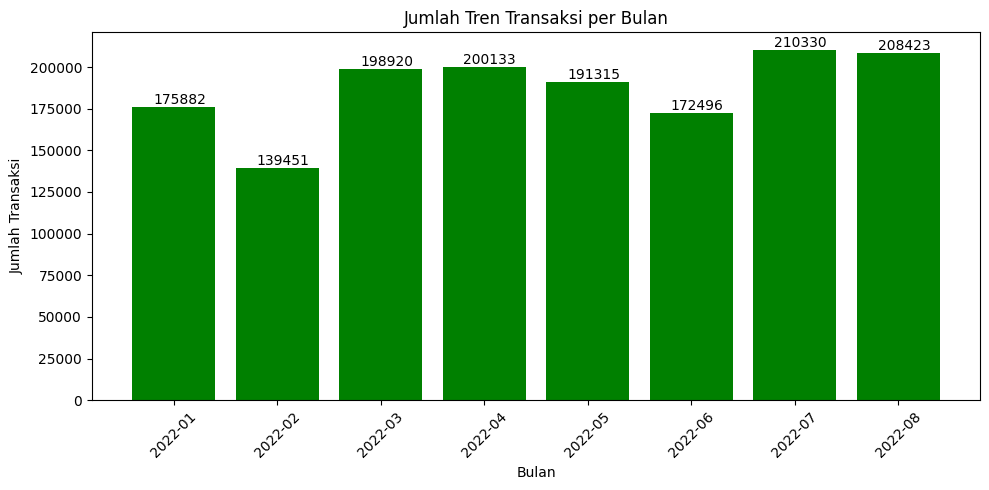

In [13]:
trend_mount = df.groupby(df['tanggal_transaksi'].dt.to_period("M")).agg({'invoice_id':'sum'}).reset_index()
trend_mount = trend_mount.sort_values(by='tanggal_transaksi', ascending=True)
# trend_mount.head(8)

plt.figure(figsize=(10, 5))
bar = plt.bar(trend_mount['tanggal_transaksi'].astype(str), trend_mount['invoice_id'], color='green')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Tren Transaksi per Bulan')
plt.xticks(rotation=45)
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/4, yval, round(yval, 2), va='bottom')
plt.tight_layout()
plt.show()

**TOP 5 PELANGGAN**

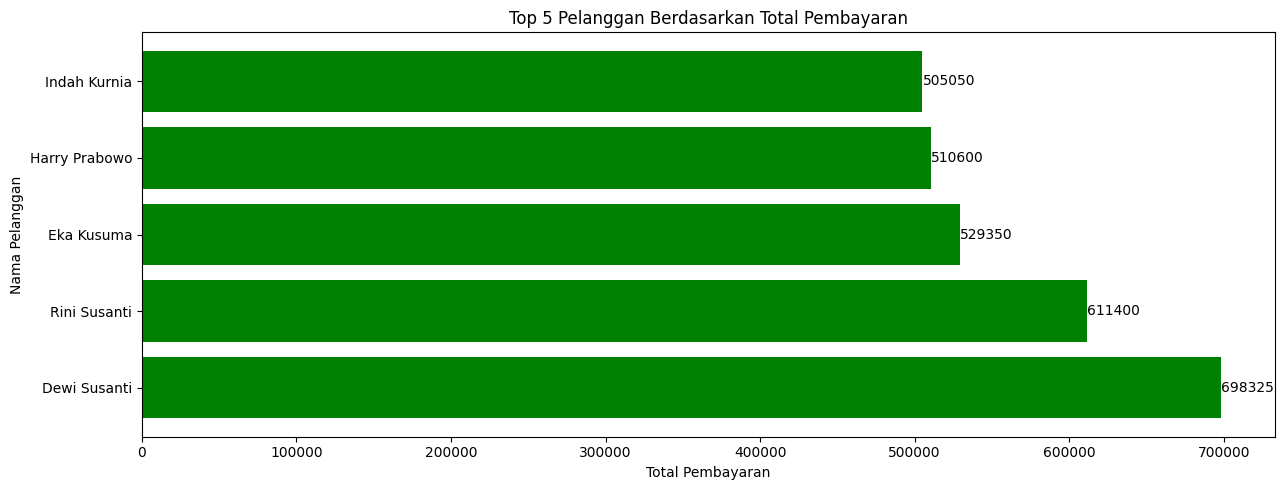

In [14]:
top_5_pelanggan = df.groupby(df['nama_pelanggan']).agg({'total_pembayaran':'sum'}).sort_values(by="total_pembayaran", ascending=False).head(5).reset_index()
plt.figure(figsize=(13, 5))
bars = plt.barh(top_5_pelanggan['nama_pelanggan'].astype(str), top_5_pelanggan['total_pembayaran'], color='green')
plt.xlabel('Total Pembayaran')
plt.ylabel('Nama Pelanggan')
plt.title('Top 5 Pelanggan Berdasarkan Total Pembayaran')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, round(width, 2), ha='left', va='center')

plt.tight_layout()
plt.show()

**JENIS PESANAN**

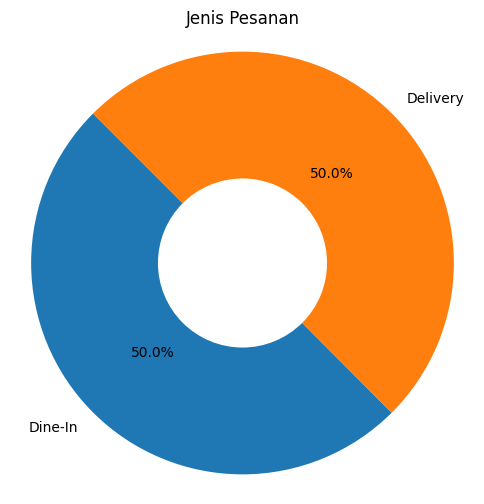

In [15]:
jns_pesanan = df.groupby(df['jenis_pesanan']).agg({'quantity':'sum'}).sort_values(by="jenis_pesanan", ascending=False).reset_index()
plt.figure(figsize=(6, 6))
plt.pie(jns_pesanan['quantity'], labels=jns_pesanan['jenis_pesanan'], autopct='%1.1f%%', startangle=135, wedgeprops=dict(width=0.6))
plt.title('Jenis Pesanan')
plt.axis('equal')
plt.show()

**Tipe Pembayaran**

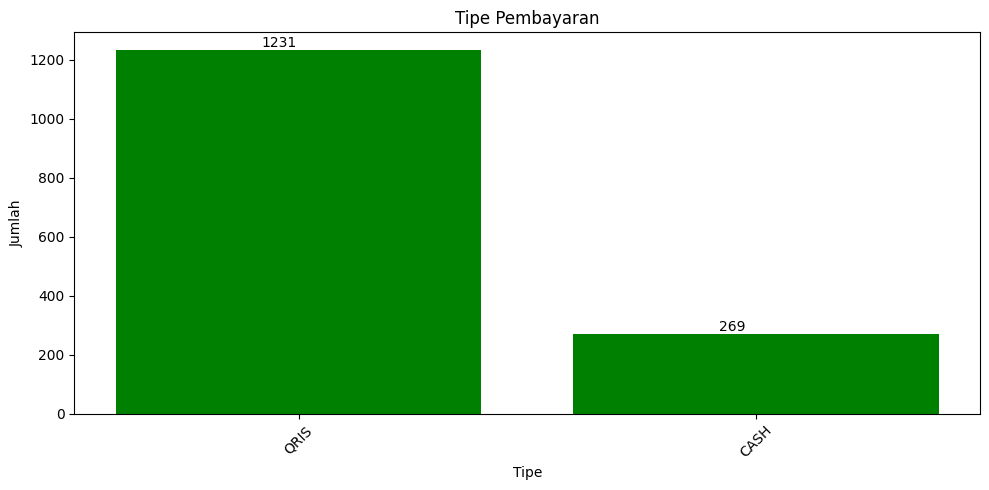

In [70]:
tipe_pemb = df.groupby('tipe_pembayaran')['invoice_id'].nunique().reset_index().sort_values(by="tipe_pembayaran", ascending=False)
# print(tipe_pemb)

plt.figure(figsize=(10, 5))
bar = plt.bar(tipe_pemb['tipe_pembayaran'].astype(str), tipe_pemb['invoice_id'], color='green')
plt.xlabel('Tipe')
plt.ylabel('Jumlah')
plt.title('Tipe Pembayaran')
plt.xticks(rotation=45)
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.5, yval, round(yval, 2), va='bottom')
plt.tight_layout()
plt.show()

**Top 5 Topping**

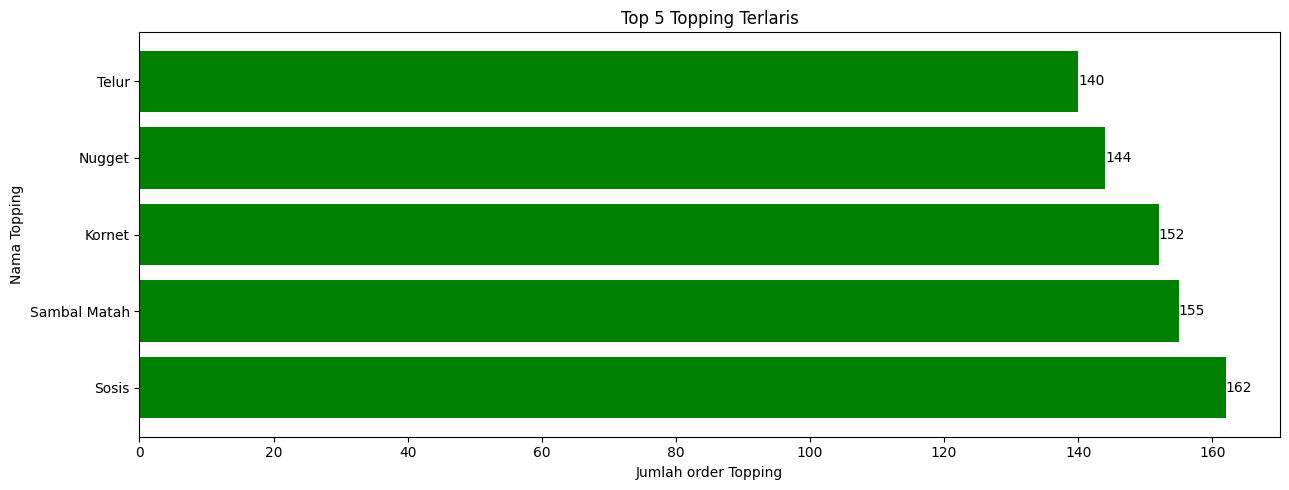

In [73]:
topping = df[df["jenis_produk"]=="topping"]
top_5_topping = topping.groupby('nama_produk').agg({'quantity':'sum'}).sort_values(by="quantity", ascending=False).reset_index()
# top_5_topping.head()

plt.figure(figsize=(13, 5))
bars = plt.barh(top_5_topping['nama_produk'].astype(str), top_5_topping['quantity'], color='green')
plt.xlabel('Jumlah order Topping')
plt.ylabel('Nama Topping')
plt.title('Top 5 Topping Terlaris')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, round(width, 2), ha='left', va='center')

plt.tight_layout()
plt.show()

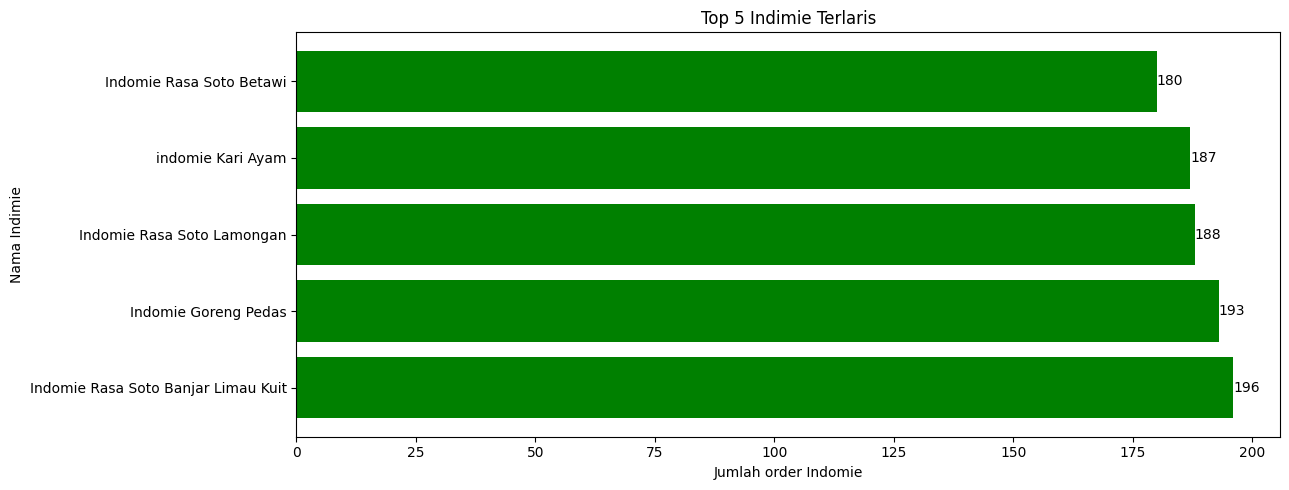

In [77]:
top_5_indomie = df.groupby(df['nama_produk']).agg({'quantity':'sum'}).sort_values(by="quantity", ascending=False).reset_index().head(5)
# top_5_indomie.head()

plt.figure(figsize=(13, 5))
bars = plt.barh(top_5_indomie['nama_produk'].astype(str), top_5_indomie['quantity'], color='green')
plt.xlabel('Jumlah order Indomie')
plt.ylabel('Nama Indimie')
plt.title('Top 5 Indimie Terlaris')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, round(width, 2), ha='left', va='center')

plt.tight_layout()
plt.show()